In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

%matplotlib inline

In [473]:
df = pd.read_excel('/content/drive/My Drive/Machine Learning/ANZ/ANZ synthesised transaction dataset.xlsx', sheet_name ='DSynth_Output_100c_3m_v3' )

In [474]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [475]:
salary = df[df['movement']=='credit']
salary.head().T

,50,61,64,68,70
status,posted,posted,posted,posted,posted
card_present_flag,NaN,NaN,NaN,NaN,NaN
bpay_biller_code,0,0,0,0,0
account,ACC-588564840,ACC-1650504218,ACC-3326339947,ACC-3541460373,ACC-2776252858
currency,AUD,AUD,AUD,AUD,AUD
long_lat,151.27 -33.76,145.01 -37.93,151.18 -33.80,145.00 -37.83,144.95 -37.76
txn_description,PAY/SALARY,PAY/SALARY,PAY/SALARY,PAY/SALARY,PAY/SALARY
merchant_id,NaN,NaN,NaN,NaN,NaN
merchant_code,0,0,0,0,0
first_name,Isaiah,Marissa,Eric,Jeffrey,Kristin


In [476]:
salary.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [477]:
salary['year'] = pd.DatetimeIndex(salary['date']).year
salary['month'] = pd.DatetimeIndex(salary['date']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [478]:
salary.tail().T

,11995,12000,12001,12003,12004
status,posted,posted,posted,posted,posted
card_present_flag,NaN,NaN,NaN,NaN,NaN
bpay_biller_code,0,0,0,0,0
account,ACC-1973887809,ACC-819621312,ACC-2920611728,ACC-1799207998,ACC-2171593283
currency,AUD,AUD,AUD,AUD,AUD
long_lat,115.78 -31.90,145.04 -37.85,144.96 -37.76,150.68 -33.79,146.94 -36.04
txn_description,PAY/SALARY,PAY/SALARY,PAY/SALARY,PAY/SALARY,PAY/SALARY
merchant_id,NaN,NaN,NaN,NaN,NaN
merchant_code,0,0,0,0,0
first_name,Antonio,Michele,Tyler,Susan,Fernando


In [479]:
salary[salary['customer_id']=='CUS-1646621553']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,year,month
92,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,1796.37,2018-08-01,M,26,NaN,NaN,2018-08-01T16:00:00.000+0000,1098.91,00e97a9be9654405bb44f96e748b3ace,Australia,CUS-1646621553,NaN,credit,2018,8
973,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,1477.59,2018-08-08,M,26,NaN,NaN,2018-08-08T16:00:00.000+0000,1098.91,76a69d307c6844cb89d55a5d8ac85248,Australia,CUS-1646621553,NaN,credit,2018,8
1874,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,2178.57,2018-08-15,M,26,NaN,NaN,2018-08-15T16:00:00.000+0000,1098.91,d994adeb38fe444d9cf77d9ea37efff7,Australia,CUS-1646621553,NaN,credit,2018,8
2665,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,3144.33,2018-08-22,M,26,NaN,NaN,2018-08-22T16:00:00.000+0000,1098.91,d1b1f165574f4e1a9c4c5c3e5af602d5,Australia,CUS-1646621553,NaN,credit,2018,8
3599,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,3937.74,2018-08-29,M,26,NaN,NaN,2018-08-29T16:00:00.000+0000,1098.91,0fc7ab19a9f04e47828ca1ca6a0fd52f,Australia,CUS-1646621553,NaN,credit,2018,8
4544,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,4857.86,2018-09-05,M,26,NaN,NaN,2018-09-05T16:00:00.000+0000,1098.91,94dc7f59e1354d31b68cad6afba9c9fe,Australia,CUS-1646621553,NaN,credit,2018,9
5466,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,5674.54,2018-09-12,M,26,NaN,NaN,2018-09-12T16:00:00.000+0000,1098.91,dd06cc65cf474b15b84550fba6e3bb33,Australia,CUS-1646621553,NaN,credit,2018,9
6416,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,6638.45,2018-09-19,M,26,NaN,NaN,2018-09-19T16:00:00.000+0000,1098.91,b6adef7a821940d9935cd3803281be48,Australia,CUS-1646621553,NaN,credit,2018,9
7337,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,7602.45,2018-09-26,M,26,NaN,NaN,2018-09-26T16:00:00.000+0000,1098.91,9fc982f780a54938b78ec332c536a164,Australia,CUS-1646621553,NaN,credit,2018,9
8295,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,7159.90,2018-10-03,M,26,NaN,NaN,2018-10-03T16:00:00.000+0000,1098.91,30fe349a77ef47628da0a3d0ff196dc9,Australia,CUS-1646621553,NaN,credit,2018,10


In [480]:
monthly_salary = salary.groupby(['gender','age','customer_id','month'])['amount'].agg([sum, np.mean])
monthly_salary

sum     mean
gender age customer_id    month                  
F      18  CUS-1842679196 8      3045.32   761.33
                          9      3045.32   761.33
                          10     3806.65   761.33
           CUS-3702001629 8      3075.36  1537.68
                          9      3075.36  1537.68
...                                  ...      ...
M      69  CUS-1388323263 9      4172.48  1043.12
                          10     5215.60  1043.12
       78  CUS-1646183815 8      3129.68   782.42
                          9      3129.68   782.42
                          10     3129.68   782.42

[296 rows x 2 columns]

In [481]:
monthly_salary.columns = ['monthly_pay', 'weekly_pay']
monthly_salary

monthly_pay  weekly_pay
gender age customer_id    month                         
F      18  CUS-1842679196 8          3045.32      761.33
                          9          3045.32      761.33
                          10         3806.65      761.33
           CUS-3702001629 8          3075.36     1537.68
                          9          3075.36     1537.68
...                                      ...         ...
M      69  CUS-1388323263 9          4172.48     1043.12
                          10         5215.60     1043.12
       78  CUS-1646183815 8          3129.68      782.42
                          9          3129.68      782.42
                          10         3129.68      782.42

[296 rows x 2 columns]

In [482]:
monthly_salary.reset_index(inplace=True)
monthly_salary

,gender,age,customer_id,month,monthly_pay,weekly_pay
0,F,18,CUS-1842679196,8,3045.32,761.33
1,F,18,CUS-1842679196,9,3045.32,761.33
2,F,18,CUS-1842679196,10,3806.65,761.33
3,F,18,CUS-3702001629,8,3075.36,1537.68
4,F,18,CUS-3702001629,9,3075.36,1537.68
...,...,...,...,...,...,...
291,M,69,CUS-1388323263,9,4172.48,1043.12
292,M,69,CUS-1388323263,10,5215.60,1043.12
293,M,78,CUS-1646183815,8,3129.68,782.42
294,M,78,CUS-1646183815,9,3129.68,782.42


In [483]:
annual_salary = monthly_salary.groupby(['gender','age', 'customer_id'])['weekly_pay', 'monthly_pay'].agg([np.mean])
annual_salary

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


weekly_pay  monthly_pay
                                mean         mean
gender age customer_id                           
F      18  CUS-1842679196     761.33  3299.096667
           CUS-3702001629    1537.68  3075.360000
           CUS-586638664     1952.29  3904.580000
       19  CUS-1928710999    2485.37  5799.196667
           CUS-3174332735    3676.94  7353.880000
...                              ...          ...
M      44  CUS-1892177589    2887.34  5774.680000
       46  CUS-2370108457    2179.96  4359.920000
       52  CUS-134833760     3785.78  8833.486667
       69  CUS-1388323263    1043.12  4867.893333
       78  CUS-1646183815     782.42  3129.680000

[100 rows x 2 columns]

In [484]:
annual_salary.columns = ['weekly_pay', 'monthly_pay']
annual_salary['annual_pay'] = annual_salary['weekly_pay']*52

annual_salary

weekly_pay  monthly_pay  annual_pay
gender age customer_id                                        
F      18  CUS-1842679196      761.33  3299.096667    39589.16
           CUS-3702001629     1537.68  3075.360000    79959.36
           CUS-586638664      1952.29  3904.580000   101519.08
       19  CUS-1928710999     2485.37  5799.196667   129239.24
           CUS-3174332735     3676.94  7353.880000   191200.88
...                               ...          ...         ...
M      44  CUS-1892177589     2887.34  5774.680000   150141.68
       46  CUS-2370108457     2179.96  4359.920000   113357.92
       52  CUS-134833760      3785.78  8833.486667   196860.56
       69  CUS-1388323263     1043.12  4867.893333    54242.24
       78  CUS-1646183815      782.42  3129.680000    40685.84

[100 rows x 3 columns]

In [485]:
annual_salary.reset_index(inplace=True)
annual_salary

,gender,age,customer_id,weekly_pay,monthly_pay,annual_pay
0,F,18,CUS-1842679196,761.33,3299.096667,39589.16
1,F,18,CUS-3702001629,1537.68,3075.360000,79959.36
2,F,18,CUS-586638664,1952.29,3904.580000,101519.08
3,F,19,CUS-1928710999,2485.37,5799.196667,129239.24
4,F,19,CUS-3174332735,3676.94,7353.880000,191200.88
...,...,...,...,...,...,...
95,M,44,CUS-1892177589,2887.34,5774.680000,150141.68
96,M,46,CUS-2370108457,2179.96,4359.920000,113357.92
97,M,52,CUS-134833760,3785.78,8833.486667,196860.56
98,M,69,CUS-1388323263,1043.12,4867.893333,54242.24


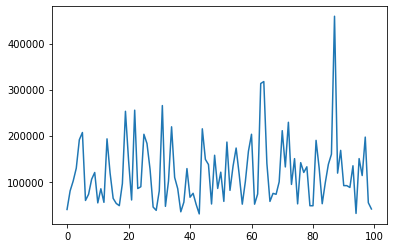

In [486]:
plt.plot(range(100), annual_salary['annual_pay'])
plt.show()

In [487]:
spending = df[df['movement']=='debit']
spending['month'] = pd.DatetimeIndex(spending['date']).month
spending['year'] = pd.DatetimeIndex(spending['date']).year
spending['day'] = spending['date'].apply(lambda x: x.strftime("%A"))
spending.head().T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,0,1,2,3,4
status,authorized,authorized,authorized,authorized,authorized
card_present_flag,1,0,1,1,1
bpay_biller_code,NaN,NaN,NaN,NaN,NaN
account,ACC-1598451071,ACC-1598451071,ACC-1222300524,ACC-1037050564,ACC-1598451071
currency,AUD,AUD,AUD,AUD,AUD
long_lat,153.41 -27.95,153.41 -27.95,151.23 -33.94,153.10 -27.66,153.41 -27.95
txn_description,POS,SALES-POS,POS,SALES-POS,SALES-POS
merchant_id,81c48296-73be-44a7-befa-d053f48ce7cd,830a451c-316e-4a6a-bf25-e37caedca49e,835c231d-8cdf-4e96-859d-e9d571760cf0,48514682-c78a-4a88-b0da-2d6302e64673,b4e02c10-0852-4273-b8fd-7b3395e32eb0
merchant_code,NaN,NaN,NaN,NaN,NaN
first_name,Diana,Diana,Michael,Rhonda,Diana


In [488]:
spending.day.value_counts()

Wednesday    1891
Friday       1872
Saturday     1709
Thursday     1658
Sunday       1550
Tuesday      1327
Monday       1153
Name: day, dtype: int64

In [489]:
daily_exp = spending.groupby(['customer_id', 'month', 'day', 'date' ])['amount'].agg([sum])
daily_exp

sum
customer_id    month day       date              
CUS-1005756958 8     Friday    2018-08-03   46.72
                               2018-08-10  124.52
                               2018-08-17   45.43
                     Monday    2018-08-06   16.66
                               2018-08-13   13.08
...                                           ...
CUS-883482547  10    Wednesday 2018-10-03   90.60
                               2018-10-10  195.30
                               2018-10-17   68.44
                               2018-10-24   33.00
                               2018-10-31   33.00

[5172 rows x 1 columns]

In [490]:
daily_exp.reset_index(inplace=True)

In [491]:
daywise_exp = daily_exp.groupby(['day','date'])['sum'].agg([sum])
daywise_exp.reset_index(inplace=True)
daywise_exp

,day,date,sum
0,Friday,2018-08-03,8035.90
1,Friday,2018-08-10,4486.92
2,Friday,2018-08-17,6845.53
3,Friday,2018-08-24,4623.11
4,Friday,2018-08-31,6227.93
...,...,...,...
86,Wednesday,2018-10-03,8131.69
87,Wednesday,2018-10-10,5078.00
88,Wednesday,2018-10-17,8069.72
89,Wednesday,2018-10-24,7878.99


In [492]:
daywise_exp = daywise_exp.groupby(['day'])['sum'].agg([np.mean])
daywise_exp

,mean
day,
Friday,6864.589231
Monday,5031.762308
Saturday,7154.043077
Sunday,6321.120000
Thursday,7306.446667
Tuesday,5710.835385
Wednesday,6782.817143


In [493]:
daywise_exp = daywise_exp.loc[['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],:]

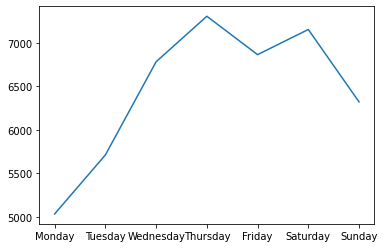

In [494]:
plt.plot(daywise_exp['mean'])

In [495]:
daily_exp['week'] = daily_exp['date'].dt.week

In [496]:
daily_exp

,customer_id,month,day,date,sum,week
0,CUS-1005756958,8,Friday,2018-08-03,46.72,31
1,CUS-1005756958,8,Friday,2018-08-10,124.52,32
2,CUS-1005756958,8,Friday,2018-08-17,45.43,33
3,CUS-1005756958,8,Monday,2018-08-06,16.66,32
4,CUS-1005756958,8,Monday,2018-08-13,13.08,33
...,...,...,...,...,...,...
5167,CUS-883482547,10,Wednesday,2018-10-03,90.60,40
5168,CUS-883482547,10,Wednesday,2018-10-10,195.30,41
5169,CUS-883482547,10,Wednesday,2018-10-17,68.44,42
5170,CUS-883482547,10,Wednesday,2018-10-24,33.00,43


In [497]:
weekwise = daily_exp.groupby(['customer_id', 'month','week'])['sum'].agg([sum])
weekwise

sum
customer_id    month week        
CUS-1005756958 8     31    353.55
                     32    553.63
                     33    298.49
                     34    923.85
                     35    128.00
...                           ...
CUS-883482547  10    40    507.28
                     41    605.56
                     42    250.75
                     43    566.21
                     44    175.93

[1417 rows x 1 columns]

In [498]:
weekwise.reset_index(inplace=True)
weekwise[weekwise['customer_id']=='CUS-1005756958']

,customer_id,month,week,sum
0,CUS-1005756958,8,31,353.55
1,CUS-1005756958,8,32,553.63
2,CUS-1005756958,8,33,298.49
3,CUS-1005756958,8,34,923.85
4,CUS-1005756958,8,35,128.00
5,CUS-1005756958,9,36,148.00
6,CUS-1005756958,9,37,167.34
7,CUS-1005756958,9,38,156.00
8,CUS-1005756958,9,39,310.00
9,CUS-1005756958,10,40,148.00


In [499]:
weekly = weekwise.groupby(['customer_id'])['sum'].agg([np.mean])
weekly.columns = ['avg_weekly_exp']

In [500]:
weekly

,avg_weekly_exp
customer_id,
CUS-1005756958,304.405000
CUS-1117979751,595.588000
CUS-1140341822,367.436000
CUS-1147642491,480.910714
CUS-1196156254,581.640667
...,...
CUS-72755508,195.323571
CUS-809013380,380.584286
CUS-860700529,483.210667


In [501]:
monthly_exp = weekwise.groupby(['customer_id','month'])['sum'].agg([sum])
monthly_exp.reset_index(inplace=True)
monthly_exp = monthly_exp.groupby('customer_id')['sum'].agg([np.mean])
monthly_exp.columns = ['avg_monthly_exp']
monthly_exp

,avg_monthly_exp
customer_id,
CUS-1005756958,1217.620000
CUS-1117979751,2977.940000
CUS-1140341822,1837.180000
CUS-1147642491,2244.250000
CUS-1196156254,2908.203333
...,...
CUS-72755508,911.510000
CUS-809013380,1776.060000
CUS-860700529,2416.053333


In [502]:
expenses = weekly.merge(monthly_exp, on = 'customer_id')
cust_data = expenses.merge(annual_salary, on = 'customer_id')

In [503]:
cust_data 

,customer_id,avg_weekly_exp,avg_monthly_exp,gender,age,weekly_pay,monthly_pay,annual_pay
0,CUS-1005756958,304.405000,1217.620000,F,53,970.47,4205.370000,50464.44
1,CUS-1117979751,595.588000,2977.940000,M,21,3578.65,8350.183333,186089.80
2,CUS-1140341822,367.436000,1837.180000,M,28,1916.51,3833.020000,99658.52
3,CUS-1147642491,480.910714,2244.250000,F,34,1711.39,7416.023333,88992.28
4,CUS-1196156254,581.640667,2908.203333,F,34,3903.73,9108.703333,202993.96
...,...,...,...,...,...,...,...,...
95,CUS-72755508,195.323571,911.510000,F,35,725.32,2901.280000,37716.64
96,CUS-809013380,380.584286,1776.060000,F,21,1037.07,4493.970000,53927.64
97,CUS-860700529,483.210667,2416.053333,M,30,1808.62,3617.240000,94048.24
98,CUS-880898248,204.183571,952.856667,M,26,1433.98,2867.960000,74566.96


In [504]:
gender_map = {'F': 0, 'M': 1}
cust_data['gender'] = cust_data['gender'].map(gender_map)
cust_data.head()

,customer_id,avg_weekly_exp,avg_monthly_exp,gender,age,weekly_pay,monthly_pay,annual_pay
0,CUS-1005756958,304.405000,1217.620000,0,53,970.47,4205.370000,50464.44
1,CUS-1117979751,595.588000,2977.940000,1,21,3578.65,8350.183333,186089.80
2,CUS-1140341822,367.436000,1837.180000,1,28,1916.51,3833.020000,99658.52
3,CUS-1147642491,480.910714,2244.250000,0,34,1711.39,7416.023333,88992.28
4,CUS-1196156254,581.640667,2908.203333,0,34,3903.73,9108.703333,202993.96


In [505]:
cust_data.corrwith(cust_data['annual_pay'])

avg_weekly_exp     0.090147
avg_monthly_exp    0.106760
gender             0.154113
age               -0.135264
weekly_pay         1.000000
monthly_pay        0.620235
annual_pay         1.000000
dtype: float64

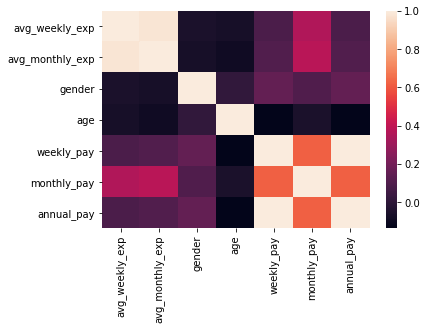

In [506]:
sns.heatmap(cust_data.corr())

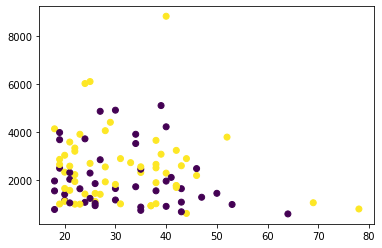

In [507]:
plt.scatter(cust_data['age'], cust_data['weekly_pay'], c = cust_data['gender'])
#plt.legend([{0:'Female'},{1: 'Male'}])
plt.show()

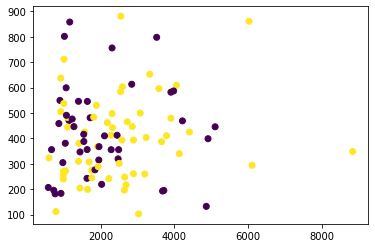

In [508]:
plt.scatter(cust_data['weekly_pay'], cust_data['avg_weekly_exp'], c = cust_data['gender'])
plt.show()

In [509]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import mean_squared_error, r2_score

Scaling

In [510]:
feature_names=[	'avg_weekly_exp',	'avg_monthly_exp','gender',	'age'	]

features = cust_data[feature_names].values
target = cust_data['annual_pay'].values

In [511]:
SS_scaler = StandardScaler()

scaled_features = SS_scaler.fit_transform(features)

trainx, testx, trainy, testy = train_test_split(scaled_features, target, test_size =0.2, random_state =42)

Model Training

In [512]:
model = LR()
model.fit(trainx,trainy)
y_pred = model.predict(testx)
r2 = model.score(testx, testy)
r2= np.square(r2)
score = mean_squared_error(testy, y_pred)
score = np.sqrt(score)
print('error: ', score)
print('r2: ', r2)

error:  78167.22553040502
r2:  0.00032716885951820853


In [513]:
model = LR()
score = cross_val_score(model, scaled_features, target, cv =3)
score.mean()

-0.06275651122900767

Text(0.5, 1.0, 'Linear Regression')

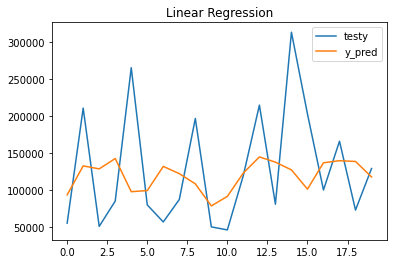

In [514]:
plt.plot(testy)
plt.plot(y_pred)
plt.legend(['testy','y_pred'])
plt.title('Linear Regression')

In [515]:
#accuracy of this model is 6%
#this is a very bad fit and should not be used to segment customers.

Decision Tree model

In [516]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [520]:
model = DTR()
model.fit(trainx,trainy)
r2 = model.score(testx,testy)
r2 = np.square(r2)
r2

1.6323781463694258

In [521]:
y_pred = model.predict(testx)
score = mean_squared_error(testy, y_pred)
score = np.sqrt(score)
print('error: ', score)


error:  116916.32296725313


In [522]:
model = DTR()
score = cross_val_score(model, scaled_features, target, cv =3)
score.mean()

-1.419689365583926

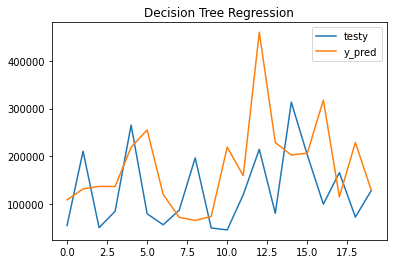

In [523]:
plt.plot(testy)
plt.plot(y_pred)
plt.legend(['testy','y_pred'])
plt.title('Decision Tree Regression')
plt.show()

In [ ]:
#Decision Tree model fits much better than Linear Regression